In [44]:
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# pd.options.display.max_rows = 10
# pd.options.display.float_format = "{:.1f}".format

In [37]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [45]:
shuffled_train_data = train_df.reindex(np.random.permutation(train_df.index))
test_df.head

<bound method NDFrame.head of       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.0      37.4                27.0       3885.0           661.0   
1        -118.3      34.3                43.0       1510.0           310.0   
2        -117.8      33.8                27.0       3589.0           507.0   
3        -118.4      33.8                28.0         67.0            15.0   
4        -119.7      36.3                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995     -119.9      34.4                23.0       1450.0           642.0   
2996     -118.1      34.1                27.0       5257.0          1082.0   
2997     -119.7      36.3                10.0        956.0           201.0   
2998     -117.1      34.1                40.0         96.0            14.0   
2999     -119.6      34.4                42.0       1765.0           263.0   

      population  households  med

In [39]:
train_df["median_house_value"] /= 1000.0
test_df["median_house_value"] /= 1000.0

In [40]:
def build_model(my_learning_rate):
  #initialize the model

  model = tf.keras.models.Sequential()

  #define its topography nodes and layers

  model.add(tf.keras.layers.Dense(units = 1, input_shape = (1, )))

  #compile the model

  model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = my_learning_rate), 
                loss = "mean_squared_error", 
                metrics = [tf.keras.metrics.RootMeanSquaredError()])
  
  return model

def train_model(model, train_df, feature, label, batch_size, epochs, validation_split):
  history = model.fit(x = train_df[feature],
                      y = train_df[label],
                      batch_size = batch_size,
                      epochs = epochs, 
                      validation_split = validation_split)
  
  trained_weights = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch
  
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, hist, rmse




In [41]:
#mae: Mean Absolute Error
def plot_the_lost_curve(epochs, mae_training, mae_validation):
  plt.figure()
  plt.xlabel("Epochs")
  plt.ylabel("Loss")

  plt.plot(epochs[1:], mae_training[1:], label = "Training loss")
  plt.plot(epochs[1:], mae_validation[1:], label = "Validation loss")
  plt.legend()

  

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


136/136 [==============================] - 1s 3ms/step - loss: 46928.7773 - root_mean_squared_error: 216.6305 - val_loss: 40458.4766 - val_root_mean_squared_error: 201.1429
Epoch 2/50
136/136 [==============================] - 0s 2ms/step - loss: 34131.7773 - root_mean_squared_error: 184.7479 - val_loss: 28933.0918 - val_root_mean_squared_error: 170.0973
Epoch 3/50
136/136 [==============================] - 0s 2ms/step - loss: 23873.5879 - root_mean_squared_error: 154.5108 - val_loss: 19858.1836 - val_root_mean_squared_error: 140.9191
Epoch 4/50
136/136 [==============================] - 0s 2ms/step - loss: 16097.0986 - root_mean_squared_error: 126.8743 - val_loss: 13262.2090 - val_root_mean_squared_error: 115.1617
Epoch 5/50
136/136 [==============================] - 0s 2ms/step - loss: 10774.7646 - root_mean_squared_error: 103.8016 - val_loss: 9144.3506 - val_root_mean_squared_error: 95.6261
Epoch 6/50
136/136 [==============================] - 0s 2ms/step - loss: 7844.3955 - root_me

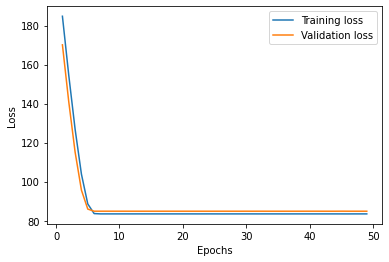

In [46]:
my_learning_rate = 0.05
batch_size = 100
epochs = 50 
validation_split = 0.2

feature = "median_income"
label = "median_house_value"

my_model = build_model(my_learning_rate)
epochs, hist, rmse = train_model(my_model, shuffled_train_data, feature, label, batch_size, epochs, validation_split)

plot_the_lost_curve(epochs, hist['root_mean_squared_error'], hist['val_root_mean_squared_error'])

In [53]:
#Evaluate the model

x_test = test_df[feature]
y_test = test_df[label]

results = my_model.evaluate(x_test, y_test, batch_size = batch_size)

print(f'Loss: {results[0]}')
print(f'Accuracy: {results[1]}')

30/30 [==============================] - 0s 12ms/step - loss: 7011.8965 - root_mean_squared_error: 83.7371
Loss: 7011.896484375
Accuracy: 83.73706817626953
